# Japan restaraunt research

Main task related to this dataset is to predic number of visitors in Japan restaraunts. So target is in visitors column and other columns are initial features.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [108]:
df_train = pd.read_csv('data/train.csv')
cores = multiprocessing.cpu_count() - 1

In [109]:
df_train.head()

,air_store_id,visit_date,visitors,dow,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,hpg_store_id
0,air_00a91d42b08b08d9,2016-07-01,35,4,17.0,36.500000,35.5,57.0,40.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc
1,air_00a91d42b08b08d9,2016-07-02,9,5,3.0,14.973684,11.0,99.0,38.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc
2,air_00a91d42b08b08d9,2016-07-04,20,0,1.0,22.457143,19.0,47.0,35.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc
3,air_00a91d42b08b08d9,2016-07-05,25,1,1.0,24.350000,24.5,43.0,40.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc
4,air_00a91d42b08b08d9,2016-07-06,29,2,15.0,28.125000,28.0,52.0,40.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc


Lets look for NA

In [110]:
df_train.isnull().sum()

air_store_id               0
visit_date                 0
visitors                   0
dow                        0
min_visitors            1640
mean_visitors           1640
median_visitors         1640
max_visitors            1640
count_observations      1640
air_genre_name          1640
air_area_name           1640
latitude                1640
longitude               1640
hpg_store_id          206089
dtype: int64

Lets drop all NaN values except hpg_store_id because 1640 from 252000 is really insignificant percent.

In [111]:
df_train.dropna(subset = ['air_area_name'], inplace=True)
df_train.isnull().sum()

air_store_id               0
visit_date                 0
visitors                   0
dow                        0
min_visitors               0
mean_visitors              0
median_visitors            0
max_visitors               0
count_observations         0
air_genre_name             0
air_area_name              0
latitude                   0
longitude                  0
hpg_store_id          204449
dtype: int64

## Working with periodical type of data

We have numeric day of week column and information about day in month and month in year in date of visit column. Lets transform it to new columns and to cyclic format

In [112]:
def extract_number_from_date(value, separator, index):
    return int(value.split(separator)[index])

In [113]:
df_train['dim'] = df_train['visit_date'].map(lambda x: extract_number_from_date(x, '-', 2)) # day in month
df_train['miy'] = df_train['visit_date'].map(lambda x: extract_number_from_date(x, '-', 1)) # month in year

del df_train['visit_date']

In [114]:
df_train.head()

,air_store_id,visitors,dow,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,hpg_store_id,dim,miy
0,air_00a91d42b08b08d9,35,4,17.0,36.500000,35.5,57.0,40.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,1,7
1,air_00a91d42b08b08d9,9,5,3.0,14.973684,11.0,99.0,38.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,2,7
2,air_00a91d42b08b08d9,20,0,1.0,22.457143,19.0,47.0,35.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,4,7
3,air_00a91d42b08b08d9,25,1,1.0,24.350000,24.5,43.0,40.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,5,7
4,air_00a91d42b08b08d9,29,2,15.0,28.125000,28.0,52.0,40.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,6,7


## Initial data research

##### Date fields

In [115]:
df_dates = df_train.filter(['visitors', 'dow', 'dim', 'miy'])

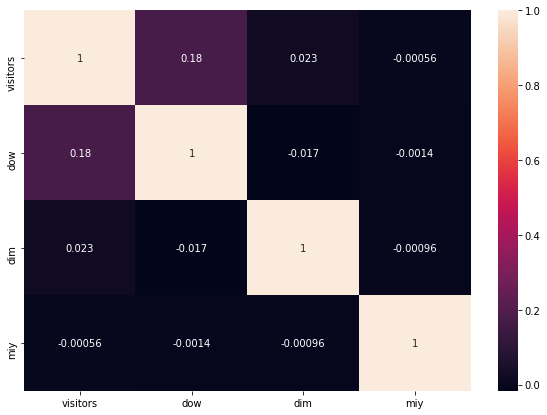

In [116]:
corr = df_dates.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

It seems like there is very small correlation between day of week and number of visitors but it is really insignificant. Other features have no correlation at all.

Lets check distribution of visitors over days of week and day of month and month in year

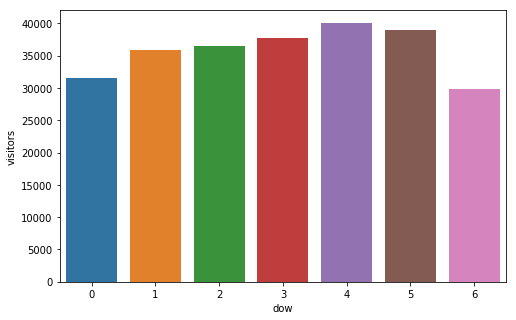

In [117]:
df_days = df_train.filter(['dow', 'visitors']).groupby('dow')['visitors'].size().reset_index()
plt.rcParams['figure.figsize'] = (8,5)
sns.barplot(x='dow', y='visitors', data=df_days)

0 - Monday, 6 - Sunday

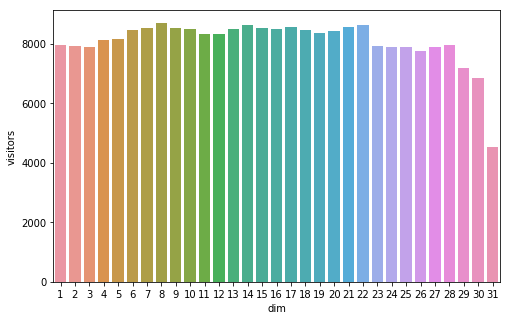

In [118]:
df_days = df_train.filter(['dim', 'visitors']).groupby('dim')['visitors'].size().reset_index()
plt.rcParams['figure.figsize'] = (8,5)
sns.barplot(x='dim', y='visitors', data=df_days)

It seems like visiting statistics are more or less stable during month. Small value at 31 is due to the fact of only half months in year have 31 days.

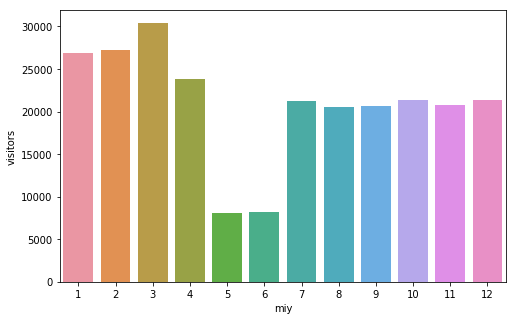

In [119]:
df_months = df_train.filter(['miy', 'visitors']).groupby('miy')['visitors'].size().reset_index()
plt.rcParams['figure.figsize'] = (8,5)
sns.barplot(x='miy', y='visitors', data=df_months)

There is clear difference in number of visitors during May and June. Maybe it is caused by lack of money after high activity during first three months in year. So I will split months in three groups:
* High activity (> 25000): January, February and March
* Medium activity (~ 20000): April, July, August, September, October, November, December
* Low activity (< 10000): May and June

In [120]:
def group_month(x):
    return {
        1: 'High', 2: 'High', 3: 'High',
        4: 'Medium', 7: 'Medium', 8: 'Medium', 9: 'Medium', 10: 'Medium', 11: 'Medium', 12: 'Medium',
        5: 'Low', 6: 'Low'
    }[x]

df_train['miy_grp'] = df_train['miy'].map(lambda x: group_month(x))

##### Genre fields
Lets look at genres distribution by number of records and number of visitors

[Text(0,0.5,'Genre'), Text(0.5,0,'Restaurants')]

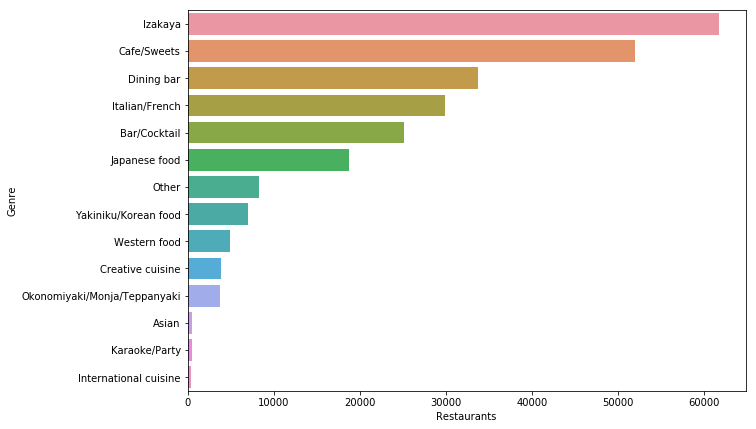

In [121]:
df_genre = df_train['air_genre_name'].value_counts().to_frame().reset_index()
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.barplot(y='index', x='air_genre_name', data=df_genre)
ax.set(xlabel='Restaurants', ylabel='Genre')

[Text(0,0.5,'Genre'), Text(0.5,0,'Visitors')]

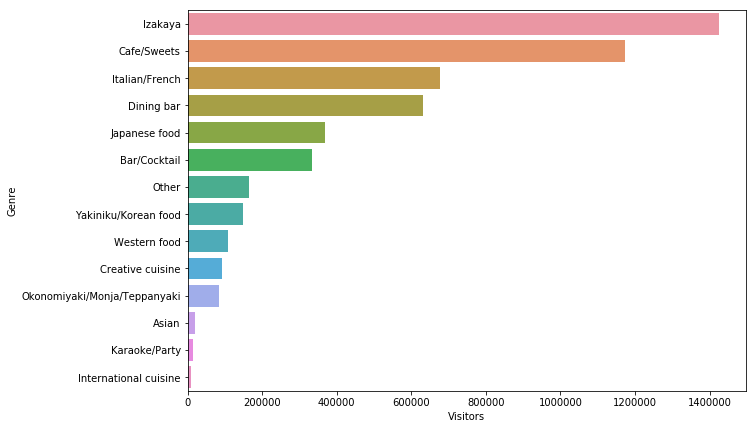

In [122]:
df_genre = df_train.filter(['air_genre_name', 'visitors']).groupby('air_genre_name')['visitors'].sum().to_frame().reset_index().sort_values('visitors', ascending=False)
ax = sns.barplot(y='air_genre_name', x='visitors', data=df_genre)
ax.set(xlabel='Visitors', ylabel='Genre')

So generally we have four levels of popularity here:
* High popularity: Izakaya, Cafe/Sweets
* Medium popularity: Dining bar, Italian/French, Bar/Cocktail, Japanese food
* Low popularity: Other, Yakiniku/Korean food, Western food, Creative cuisine, Okonomiyaki/Monja/Teppanyaki
* No popularity: Asian, Karaoke/Party, International cuisine

These groups are visible both at statistics of existing restaraunts and number of visitors in these restaraunts.

In [123]:
def group_genre(x):
    return {
        'Izakaya': 'High', 'Cafe/Sweets': 'High',
        'Dining bar': 'Medium', 'Italian/French': 'Medium', 'Bar/Cocktail': 'Medium', 'Japanese food': 'Medium',
        'Other': 'Low', 'Yakiniku/Korean food': 'Low', 'Western food': 'Low', 'Creative cuisine': 'Low', 'Okonomiyaki/Monja/Teppanyaki': 'Low',
        'Asian': 'Lowest', 'Karaoke/Party': 'Lowest', 'International cuisine': 'Lowest'
    }[x]

df_train['genre_grp'] = df_train['air_genre_name'].map(lambda x: group_genre(x))

##### Area fields
Lets extract city from area name and check distribution of visitors over different cities

In [124]:
def extract_city_from_area(value, separator, index):
    return value.split(separator)[index]

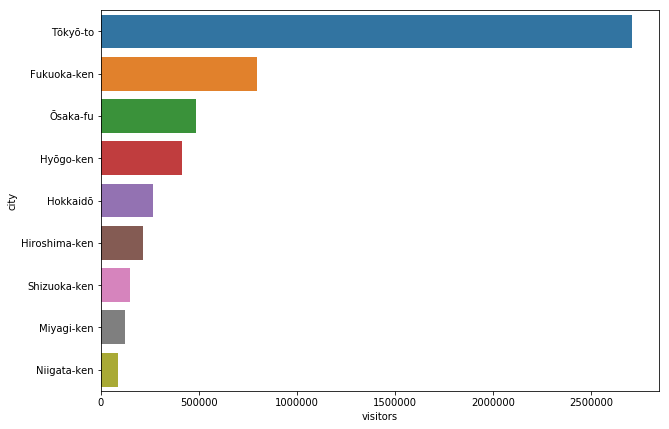

In [125]:
df_train['city'] = df_train['air_area_name'].map(lambda x: extract_city_from_area(x, ' ', 0))

df_cities = df_train.filter(['city', 'visitors']).groupby('city')['visitors'].sum().to_frame().reset_index().sort_values('visitors', ascending=False)
sns.barplot(y='city', x='visitors', data=df_cities)

Tokio is obvious leader here but lets check number of restaraunts by city. Maybe Tokios leadership is only because most of cafes are there.

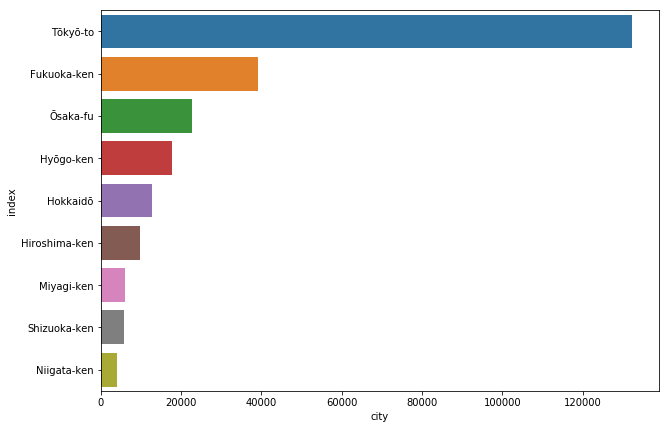

In [126]:
df_cities = df_train.filter(['city'])['city'].value_counts().to_frame().reset_index()
sns.barplot(y='index', x='city', data=df_cities)

Distribution is exactly same as on previous chart so probably big number of visitors is strongly related to number of restaraunts. Lets double check this by chart of median number of visitors per cafe per city:

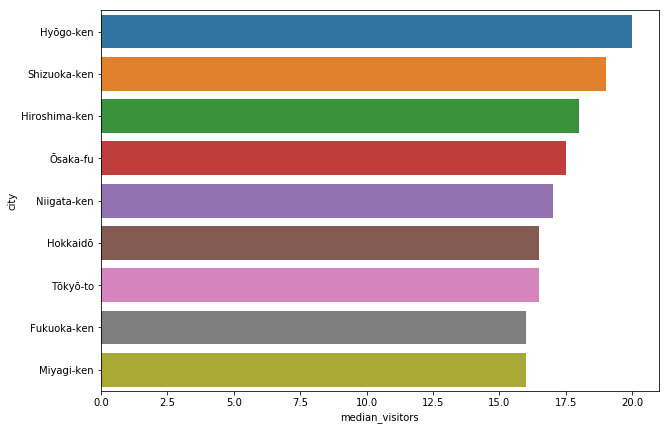

In [127]:
df_cities = df_train.filter(['city', 'median_visitors']).groupby('city').agg({'median_visitors': np.median}).reset_index().sort_values('median_visitors', ascending=False)
sns.barplot(x='median_visitors', y='city', data=df_cities)

Confirmed. There are no special cities.

##### Coordinate fields

Lets show basic heatmap about coordinates

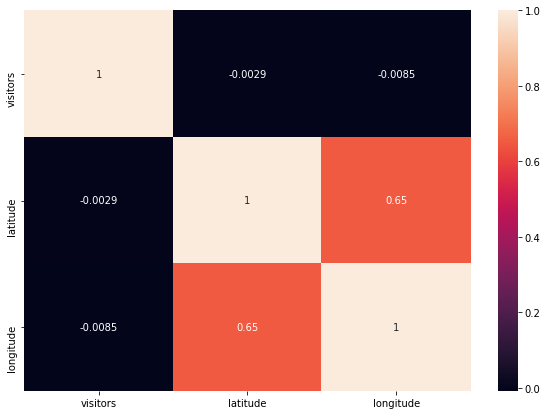

In [128]:
df_coords = df_train.filter(['visitors', 'latitude', 'longitude'])
corr = df_coords.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Strong correlation between longitude and latitude just confirms geografical facts about Japan islands position. No correlation between visitors and coordinates

##### HPG store identifier
Generally I don't know how to use this identifier because there are so many NaN values there. Lets transform NaN to 0 and all non-empty values to 1

In [129]:
df_train['hpg_store_id'].head(30)
df_train['hpg_store_id'] = np.where(df_train['hpg_store_id'].isnull(), 0, 1)
df_train.isnull().sum()

air_store_id          0
visitors              0
dow                   0
min_visitors          0
mean_visitors         0
median_visitors       0
max_visitors          0
count_observations    0
air_genre_name        0
air_area_name         0
latitude              0
longitude             0
hpg_store_id          0
dim                   0
miy                   0
miy_grp               0
genre_grp             0
city                  0
dtype: int64

## Transform periodical features to cyclic

In [130]:
def cat_to_circle(serie):
    uniq_values = set(serie)
    count_values = len(uniq_values)
    
    step = 360/count_values
    serie = np.cos(np.array([x*step for x in serie])*np.pi/180)+1
    
    return serie

In [131]:
df_train['dow'] += 1 # it is hard to process zeros (value of Monday) in this type of fields
df_train['dow'] = cat_to_circle(df_train['dow'])
df_train['dim'] = cat_to_circle(df_train['dim'])
df_train['miy'] = cat_to_circle(df_train['miy'])

## Drop useless features

In [132]:
del df_train['air_store_id']
del df_train['air_genre_name'] 
del df_train['air_area_name'] 
del df_train['latitude']
del df_train['longitude']

del df_train['min_visitors']
del df_train['mean_visitors']
del df_train['median_visitors']
del df_train['max_visitors']

df_train.head()

,visitors,dow,count_observations,hpg_store_id,dim,miy,miy_grp,genre_grp,city
0,35,0.777479,40.0,1,1.979530,0.133975,Medium,Medium,Tōkyō-to
1,9,1.623490,38.0,1,1.918958,0.133975,Medium,Medium,Tōkyō-to
2,20,1.623490,35.0,1,1.688967,0.133975,Medium,Medium,Tōkyō-to
3,25,0.777479,40.0,1,1.528964,0.133975,Medium,Medium,Tōkyō-to
4,29,0.099031,40.0,1,1.347305,0.133975,Medium,Medium,Tōkyō-to


## Create dummies for categorical features

In [133]:
df_train = pd.get_dummies(df_train)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250468 entries, 0 to 252107
Data columns (total 22 columns):
visitors              250468 non-null int64
dow                   250468 non-null float64
count_observations    250468 non-null float64
hpg_store_id          250468 non-null int64
dim                   250468 non-null float64
miy                   250468 non-null float64
miy_grp_High          250468 non-null uint8
miy_grp_Low           250468 non-null uint8
miy_grp_Medium        250468 non-null uint8
genre_grp_High        250468 non-null uint8
genre_grp_Low         250468 non-null uint8
genre_grp_Lowest      250468 non-null uint8
genre_grp_Medium      250468 non-null uint8
city_Fukuoka-ken      250468 non-null uint8
city_Hiroshima-ken    250468 non-null uint8
city_Hokkaidō         250468 non-null uint8
city_Hyōgo-ken        250468 non-null uint8
city_Miyagi-ken       250468 non-null uint8
city_Niigata-ken      250468 non-null uint8
city_Shizuoka-ken     250468 non-null uint8
c

In [134]:
y_train = df_train['visitors']
X_train = df_train.loc[:, df_train.columns != 'visitors']

# Initial feature importance evaluation
We have 21 features. Some of them are important and others are not. Lets use LinearRegression, Lasso and Random Forest to find most important features.

In [135]:
lr = LinearRegression(n_jobs = cores)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=9, normalize=False)

In [136]:
lr_coeficients = lr.coef_
#lr_coeficients

In [137]:
x_columns = X_train.columns.values
#x_columns

In [138]:
lr_data = pd.DataFrame({'features': x_columns, 'lr_importance': lr_coeficients}).sort_values('lr_importance', ascending=False)
#lr_data

In [139]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
lasso_coeficients = lasso.coef_
#lasso_coeficients

In [140]:
ls_data = pd.DataFrame({'features': x_columns, 'ls_importance': lasso_coeficients}).sort_values('ls_importance', ascending=False)
#ls_data

In [141]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=cores).fit(X_train, y_train)
rf_coeficients = rf.feature_importances_
#rf_coeficients

In [142]:
rf_data = pd.DataFrame({'features': x_columns, 'rf_importance': rf_coeficients}).sort_values('rf_importance', ascending=False)
#rf_data

So top 10 features based on three validators are following. Note that for Lasso only non-zero features were included.

| Linear Regression | Lasso | Random Forest |
|-----|----|-----|
| genre_grp_Lowest | dow | dim |
| city_Shizuoka-ken | hpg_store_id | count_observations |
| hpg_store_id | genre_grp_High | miy |
| dow | count_observations | dow |
| city_Hyōgo-ken | --- | hpg_store_id |
| city_Ōsaka-fu | --- | city_Tōkyō-to |
| miy_grp_Medium | --- | genre_grp_Medium |
| miy_grp_High | --- | miy_grp_Medium |
| count_observations | --- | miy_grp_High |
| dim | --- | city_Fukuoka-ken |

So we have following number of occurences of features in top half of our validators results:
* 3 occurences: dow, hpg_store_id, count_observations
* 2 occurences: miy_grp_Medium, miy_grp_High, dim
* 1 occurences: genre_grp_Lowest, city_*, genre_grp_Medium

##### Few conclusions
* 4 from 6 features related to date and time were marked as important. Probably it will be good idea to dig more in time-related part of data set and to extract more features. Maybe it will be also worth to try to create feature combinations.
* Genres are not important
* Area is not important
* Fact that restaurant was registered both in AIR and HPG is important.

# Features ansambling
Lets try to create combinations of features using set of features evaluated as significant of previous step.

In [143]:
pf = PolynomialFeatures(degree=3, include_bias=False)
X_polinomial = pf.fit_transform(X_train)
pf_features = pf.get_feature_names(x_columns)

In [144]:
lr_poly = LinearRegression(n_jobs = cores)
lr_poly.fit(X_polinomial, y_train)

lr_poly_coeficients = lr_poly.coef_

In [145]:
lr_poly_data = pd.DataFrame({'features': pf_features, 'lr_importance': lr_poly_coeficients}).sort_values('lr_importance', ascending=False)
lr_poly_data = lr_poly_data.head(15)

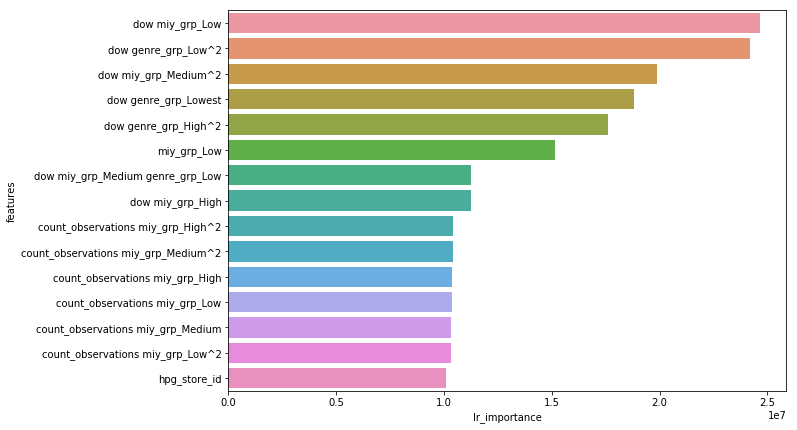

In [146]:
sns.barplot(x='lr_importance', y='features', data=lr_poly_data)

##### Few conclusions
* First six features are looking really good. Number six is in our initial list so lets add first five issues to dataset.
* Feature number 6 was evaluated as not interesting at previous step of analyzis. Probably it is good example of dependency between features.

In [147]:
X_train['dow_miy_grp_Low'] = X_train['dow']*X_train['miy_grp_Low']
X_train['dow_genre_grp_Low_2'] = X_train['dow']*pow(X_train['genre_grp_Low'], 2)
X_train['dow_miy_grp_Medium_2'] = X_train['dow']*pow(X_train['miy_grp_Medium'], 2)
X_train['dow_genre_grp_Lowest'] = X_train['dow']*X_train['genre_grp_Lowest']
X_train['dow_genre_grp_High_2'] = X_train['dow']*pow(X_train['genre_grp_High'], 2)

In [148]:
x_columns = X_train.columns.values

In [149]:
lr = LinearRegression(n_jobs = cores)
lr.fit(X_train, y_train)

lr_coeficients = lr.coef_
for (index, lc) in enumerate(lr_coeficients):
    if lc < 0:
        lr_coeficients[index] = 0   
        
lr_data = pd.DataFrame({'features': x_columns, 'lr_importance': lr_coeficients}).sort_values('lr_importance', ascending=False)
#lr_data

In [150]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

lasso_coeficients = lasso.coef_
for (index, lc) in enumerate(lasso_coeficients):
    if lc < 0:
        lasso_coeficients[index] = 0   

ls_data = pd.DataFrame({'features': x_columns, 'ls_importance': lasso_coeficients}).sort_values('ls_importance', ascending=False)
#ls_data

In [151]:
rf = RandomForestRegressor(n_estimators=200, n_jobs=cores).fit(X_train, y_train)
rf_coeficients = rf.feature_importances_
rf_data = pd.DataFrame({'features': x_columns, 'rf_importance': rf_coeficients}).sort_values('rf_importance', ascending=False)
#rf_data

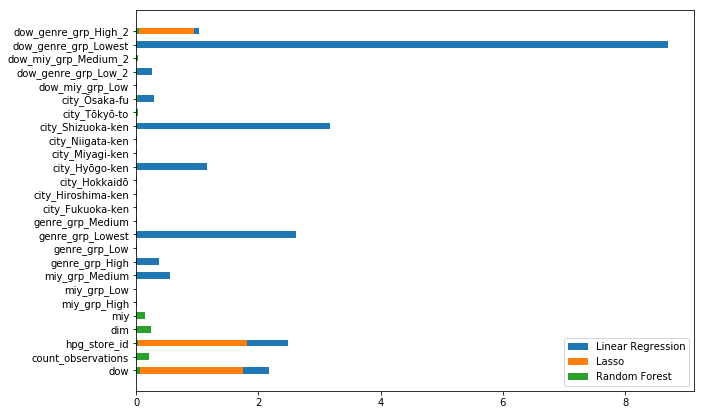

In [152]:
ind = np.arange(len(rf_coeficients))
width = 0.5

p1 = plt.barh(ind, lr_coeficients, width)
p2 = plt.barh(ind, lasso_coeficients, width)
p3 = plt.barh(ind, rf_coeficients, width)
plt.yticks(ind, x_columns)
plt.legend((p1[0], p2[0], p3[0]), ('Linear Regression', 'Lasso', 'Random Forest'))

plt.show()